Hi, I am **Aman Yadav**, currently pursuing a Master’s degree in Life Science Informatics at the **Technical University of Deggendorf, Germany**. This project was undertaken independently as a personal hobby and is not associated with my university coursework.

In this project, I utilized a dataset from the **National Institute of Diabetes** (**https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database**) to predict outcomes using various supervised learning models through the Bagging ensemble technique. The goal was to assess the performance of different models and identify which one proved to be the most accurate for making reliable predictions. In the end, I will present my findings, highlighting the model that demonstrated the highest accuracy and potential for further application in predictive analytics.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from itertools import combinations
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. **The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset**. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The reason of choosing this data is because, As of the most recent data, **India** leads the world in the number of people with diabetes. According to the International Diabetes Federation (IDF) and other global health organizations, India has the highest number of people living with diabetes, with estimates exceeding 74 million cases as of 2021.

Following India, China also has a very high prevalence of diabetes, with a slightly lower total number of cases compared to India.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [3]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


We have our data loaded and ready to analyze. Let's first examine the **ratio of positive to negative outcomes** in the dataset. Understanding this distribution will give us an initial sense of the probability of predicting a positive or negative outcome when we run our prediction models.

In [4]:
df.Outcome.value_counts()



Outcome
0    500
1    268
Name: count, dtype: int64

In [66]:
ratio_P = 268/767 * 100

ratio_N = 500/767 * 100
print("negative outcomes ", ratio_N)
print("positive outcomes ", ratio_P)

negative outcomes  65.1890482398957
positive outcomes  34.94132985658409


This shows that how many positives and negative outcome are there in the main data sheet 

**negative outcomes** 65.1%
**Positive outcome** 34.9%9

**Calculation of AIC** -  calculating the **Akaike Information Criterion (AIC)** is crucial for selecting the best model that predicts the dependent variable based on independent variables. AIC helps compare different models by evaluating how well each model explains the variability in the dependent variable while penalizing for the number of independent variables included. A model with a lower AIC indicates a better balance between fit and complexity, suggesting it provides a more efficient explanation of the dependent variable without overfitting. This ensures that the chosen model reliably predicts outcomes while accounting for the influence of the independent variables.

In [5]:
X = df.drop('Outcome', axis = 1)
Y = df["Outcome"]  # we have seprated our features and result which can be used to specify X and Y

We must seprate the feature **X** and outcome **Y** from the main dataset 

In [70]:
X = sm.add_constant(X)  
model = sm.OLS(Y, X).fit()  

k = model.df_model + 1
L = model.llf
AIC = 2*k - 2*L

print(f'AIC: {AIC}')

AIC: 781.8217907946478


Let's calculate the Akaike Information Criterion (AIC) to identify which features are important and determine which ones might be removed. By evaluating the AIC for different models with varying features, we can assess the trade-off between model complexity and fit. A lower AIC indicates a model that better balances goodness of fit with fewer features, helping us to pinpoint the most relevant predictors. This process will guide us in refining our model by retaining only the essential features and removing those that do not contribute significantly to the predictive power, ultimately enhancing the model's performance and interpretability.

**Lets see AIC of diffrent features.** 

In [72]:
X = df.drop(['Outcome', "Age"], axis = 1)
Y = df["Outcome"]  # we have seprated our features and result which can be used to specify X and Y

X = sm.add_constant(X)  
model = sm.OLS(Y, X).fit()  

k = model.df_model + 1
L = model.llf
AIC = 2*k - 2*L

print(f'AIC: {AIC}')

AIC: 782.7155646339345


In [73]:
X = df.drop(['Outcome', "Age", 'DiabetesPedigreeFunction'], axis = 1)
Y = df["Outcome"]  # we have seprated our features and result which can be used to specify X and Y
X = sm.add_constant(X)  
model = sm.OLS(Y, X).fit()  

k = model.df_model + 1
L = model.llf
AIC = 2*k - 2*L

print(f'AIC: {AIC}')

AIC: 792.0715790807453


In [75]:
X = df.drop(['Outcome', "Age", 'DiabetesPedigreeFunction', 'BMI'], axis = 1)
Y = df["Outcome"]  # we have seprated our features and result which can be used to specify X and Y
X = sm.add_constant(X)  
model = sm.OLS(Y, X).fit()  

k = model.df_model + 1
L = model.llf
AIC = 2*k - 2*L

print(f'AIC: {AIC}')

AIC: 831.0069471586091


The above codes are for explanation that how we can calculate AIC manually. But as we know that we more than 2 features, Doing it manually for each combination will take alot of time. hence we can make a function which can calculate the AIC of all the features.

In [76]:
y = df['Outcome']
features = df.drop('Outcome', axis=1).columns.tolist()

def calculate_aic(X, y):
    model = sm.OLS(y, sm.add_constant(X)).fit()
    k = model.df_model + 1  
    L = model.llf  
    return 2 * k - 2 * L

num_random_subsets = 10  
random_aic_results = []

for _ in range(num_random_subsets):
    num_features = random.randint(1, len(features))
    
    selected_features = random.sample(features, num_features)
    
    X_subset = df[selected_features]
    
    aic_value = calculate_aic(X_subset, y)
    
    random_aic_results.append({
        'features': selected_features,
        'aic': aic_value
    })
results_df = pd.DataFrame(random_aic_results)


results_df = results_df.sort_values(by='aic')
results_df

,features,aic
0,"[SkinThickness, Pregnancies, Glucose, Age, BloodPressure, BMI, DiabetesPedigreeFunction, Insulin]",781.821791
7,"[Pregnancies, BMI, Insulin, DiabetesPedigreeFunction, BloodPressure, SkinThickness, Glucose, Age]",781.821791
4,"[BloodPressure, Pregnancies, DiabetesPedigreeFunction, Insulin, BMI, SkinThickness, Glucose]",782.715565
3,"[Insulin, Glucose, SkinThickness, Age, BMI, Pregnancies]",797.296718
5,"[Age, Insulin, BMI, DiabetesPedigreeFunction, Glucose]",799.798601
2,"[Insulin, Glucose, BloodPressure]",860.105687
9,"[SkinThickness, Pregnancies, Age, BMI, BloodPressure, Insulin, DiabetesPedigreeFunction]",903.040463
1,"[BMI, BloodPressure, Pregnancies]",937.858257
6,"[BMI, Pregnancies]",938.026367
8,"[Insulin, Age]",986.107803


In [77]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
results_df["features"]

0    [SkinThickness, Pregnancies, Glucose, Age, BloodPressure, BMI, DiabetesPedigreeFunction, Insulin]
7    [Pregnancies, BMI, Insulin, DiabetesPedigreeFunction, BloodPressure, SkinThickness, Glucose, Age]
4         [BloodPressure, Pregnancies, DiabetesPedigreeFunction, Insulin, BMI, SkinThickness, Glucose]
3                                             [Insulin, Glucose, SkinThickness, Age, BMI, Pregnancies]
5                                               [Age, Insulin, BMI, DiabetesPedigreeFunction, Glucose]
2                                                                    [Insulin, Glucose, BloodPressure]
9             [SkinThickness, Pregnancies, Age, BMI, BloodPressure, Insulin, DiabetesPedigreeFunction]
1                                                                    [BMI, BloodPressure, Pregnancies]
6                                                                                   [BMI, Pregnancies]
8                                                                        

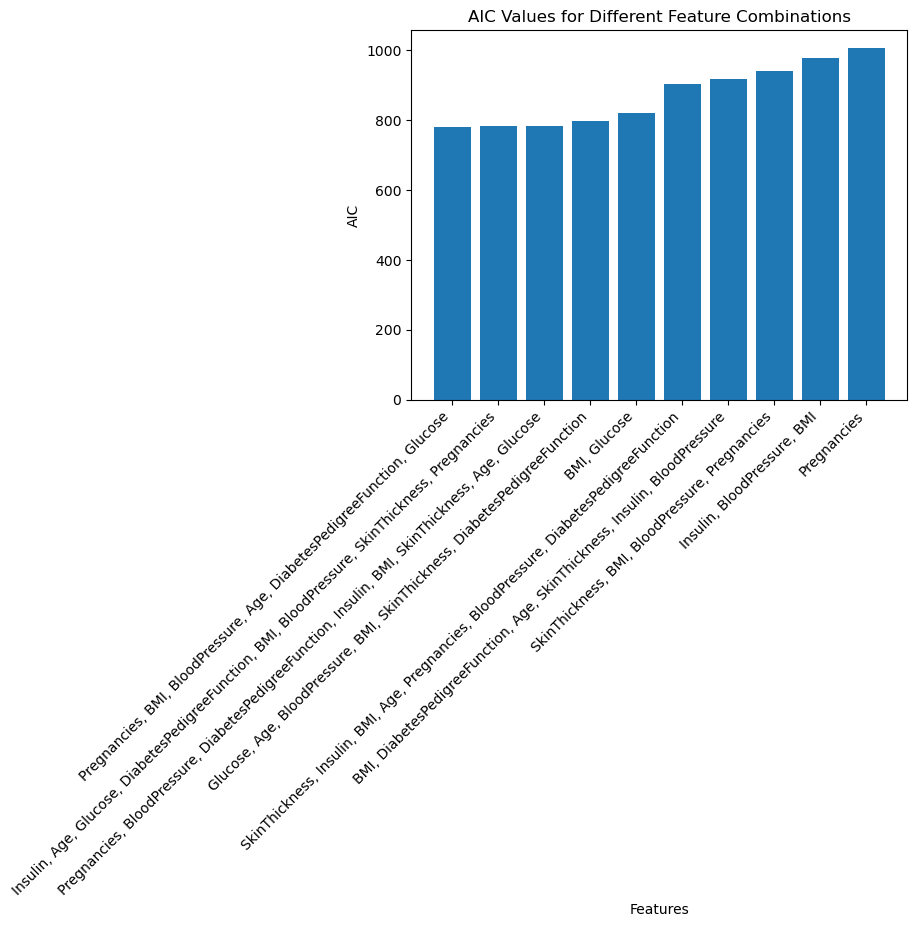

In [52]:
results_df['features_str'] = results_df['features'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x)) 
# must convert it to string because the features are in list format


graph = plt.bar(results_df['features_str'], results_df['aic'])

plt.title('AIC Values for Different Feature Combinations')
plt.xlabel('Features')
plt.ylabel('AIC')
plt.xticks(rotation=45, ha="right")
plt.show()

**Now we know what features has low AIC value. Therfore we can consider that to train our ML model.** We donr have to remove and feature because every coloum in the data sheet is contributing positively for the outcome, Therfore we got the lowest AIC of **781** compare to all other features models.

After identifying the necessary features, we can proceed to the next step: splitting the data into training and testing sets. This division is crucial for evaluating the model’s performance and ensuring it generalizes well to new, unseen data. Typically, the dataset is divided into a training set, which is used to build and train the model, and a testing set, which is used to assess the model’s accuracy and effectiveness. By properly splitting the data, we can validate the model’s predictions and make informed decisions about its performance before deploying it in real-world scenarios.

In [14]:
# Data spliting 
X = df.drop('Outcome', axis = 1)
Y = df["Outcome"] 
X_train , X_test, y_train , y_test = train_test_split(X,Y , test_size=0.2, random_state=42, stratify=y, shuffle= True)


The train_test_split function is used to divide your dataset into training and testing sets. The training set is used to build and train your model, while the testing set is used to evaluate the model's performance. By setting the parameters like test_size, random_state, stratify, and shuffle, we ensure that the split is both consistent and representative of the entire dataset, which is crucial for building and validating an effective predictive model.

In [15]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
711,5,126,78,27,22,29.6,0.439,40
373,2,105,58,40,94,34.9,0.225,25
46,1,146,56,0,0,29.7,0.564,29
682,0,95,64,39,105,44.6,0.366,22


In [16]:
y_train.head()

353    0
711    0
373    0
46     0
682    0
Name: Outcome, dtype: int64

In [17]:
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

The next step is to create our **Bagging Classifier**. For this, I am using the **Scikit-learn** library, which provides a straightforward way to implement this ensemble method. In this particular case, the base estimator for the Bagging Classifier is a **k-Nearest Neighbors (KNN)** classifier. Bagging, or Bootstrap Aggregating, works by training multiple instances of the base estimator on different subsets of the training data and then combining their predictions to improve overall performance and reduce overfitting. By leveraging Scikit-learn’s implementation, we can efficiently set up and train the Bagging Classifier with KNN as the base model.

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

main_estimator = KNeighborsClassifier(n_neighbors=5)
bagging_clf = BaggingClassifier(
    base_estimator=main_estimator, 
    n_estimators=50,  
    max_samples=0.8,  
    max_features=0.8, 
    random_state=42  )

bagging_clf.fit(X_train , y_train)
y_pred = bagging_clf.predict(X_test)


C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


**The Knn Classifier predicted 73%~ outcome correctly. let se if the accuracy changes in a diffrent base_classifier**

In this case I have used DecisionTree

In [20]:
from sklearn.tree import DecisionTreeClassifier


main_estimator = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(
    base_estimator=main_estimator, 
    n_estimators=50,  
    max_samples=0.8,  
    max_features=0.8, 
    random_state=42  )

bagging_clf.fit(X_train , y_train)
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Slighty better than Knn, approx 76% predicted value is correct**

In [21]:
from sklearn.neural_network import MLPClassifier

main_estimator = base_estimator_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

bagging_clf = BaggingClassifier(
    base_estimator=main_estimator, 
    n_estimators=50,  
    max_samples=0.8,  
    max_features=0.8, 
    random_state=42  )

bagging_clf.fit(X_train , y_train)
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.74


**The MLPClassifier is Slighty better than Knn, but not the decision tree , approx 74% predicted value is correct** But the accuracy also depends on the **hyperparameters** of the learning models. for example Nearest neigbours or the hidden layer in the neural network.

I initially implemented the Bagging Classifier separately to gain a basic understanding of how it works. However, we can streamline the process by applying the Bagging Classifier to every supervised learning model in a unified manner. The code below demonstrates how to apply Bagging with various classifiers, allowing us to evaluate and compare the performance of each model. This approach enables us to analyze which supervised learning model performs best under the same conditions.

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

base_estimators = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=300, random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}


for name, estimator in base_estimators.items():
    bagging_clf = BaggingClassifier(
        base_estimator=estimator, 
        n_estimators=50,  
        max_samples=0.8,  
        max_features=0.8, 
        random_state=42
    )
    
    bagging_clf.fit(X_train, y_train)
    y_pred = bagging_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')

C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN Accuracy: 0.73
Logistic Regression Accuracy: 0.73


C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SVM Accuracy: 0.70
Decision Tree Accuracy: 0.76


C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest Accuracy: 0.76


C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.74


We observe that all the models have similar accuracy scores, with only minor differences among them. To facilitate a clearer comparison and easier visualization, **we can plot the accuracy of each model graphically**. This will provide a straightforward way to assess their performance relative to one another and make it easier to identify the best-performing model at a glance.

In [78]:
accuracy_data = {"KNN_Accuracy": 0.73, "Logistic_Regression_Accuracy": 0.73, "SVM Accuracy": 0.70,  "Decision Tree Accuracy": 0.76,
                "Random Forest Accuracy": 0.76 , "Neural Network Accuracy": 0.74 }
final_data = accuracy_df = pd.DataFrame(list(accuracy_data.items()), columns=['Model', 'Accuracy'])
final_data


,Model,Accuracy
0,KNN_Accuracy,0.73
1,Logistic_Regression_Accuracy,0.73
2,SVM Accuracy,0.70
3,Decision Tree Accuracy,0.76
4,Random Forest Accuracy,0.76
5,Neural Network Accuracy,0.74


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'KNN_Accuracy'),
  Text(1, 0, 'Logistic_Regression_Accuracy'),
  Text(2, 0, 'SVM Accuracy'),
  Text(3, 0, 'Decision Tree Accuracy'),
  Text(4, 0, 'Random Forest Accuracy'),
  Text(5, 0, 'Neural Network Accuracy')])

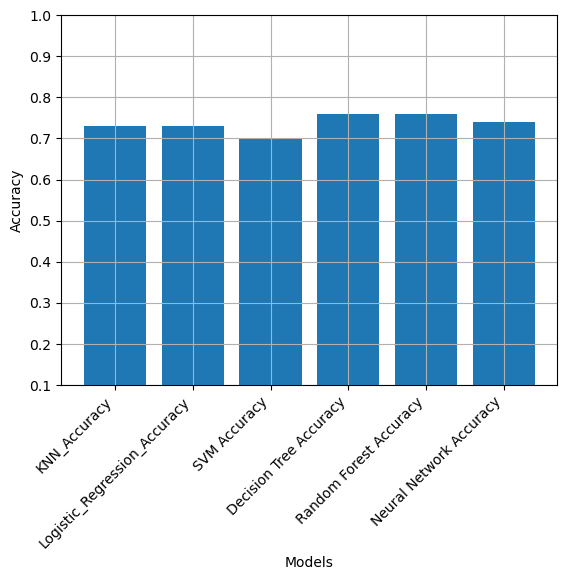

In [41]:
graphical_format = plt.bar(final_data["Model"], final_data["Accuracy"])
plt.ylim(0.1, 1)
plt.grid()
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation = 45, ha = "right")

**Conclusion**

In conclusion, the Decision Tree model performed remarkably well compared to the other models, demonstrating only a slight difference in accuracy. This indicates that the Decision Tree was the most effective in this context. Ensemble machine learning models, which combine the strengths of multiple base models, offer superior performance by aggregating predictions. These methods enhance accuracy, robustness, and generalization, making them a valuable tool in machine learning. By leveraging the collective power of various models, ensemble methods provide a more reliable and effective approach to predictive modeling.

**Using Bagging with different base classifiers helps evaluate which model performs best in conjunction with Bagging.**
**This method allows for a comprehensive comparison of various classifiers' performance when combined with Bagging.**

**Thank You**.
